In [469]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

### Data Cleaing in DataFrame

In [470]:
UCI=pd.read_csv("heart_disease_uci.csv")
UCI

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [471]:
UCI.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### chak the shap of datafram

In [472]:
UCI.shape

(920, 16)

In [473]:
UCI.duplicated().sum()

0

In [474]:
UCI.describe()
UCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [475]:
UCI.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# Now Clean The Data

##### Drop the colomn

In [476]:
UCI.drop(['ca'], axis=1, inplace=True)
UCI.drop(['dataset'], axis=1, inplace=True)

In [477]:
UCI.drop(['thal'], axis=1, inplace=True)


In [478]:
UCI.isnull().sum()

id            0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
num           0
dtype: int64

#### fill the null value intg number

In [479]:
UCI['thalch'].fillna(UCI['thalch'].mean(), inplace=True)
UCI["oldpeak"].fillna(UCI["oldpeak"].mean(),  inplace = True)
UCI["trestbps"].fillna(UCI["trestbps"].mean(),  inplace = True)
UCI["chol"].fillna(UCI["chol"].mean(),  inplace = True)

In [480]:
UCI.isnull().sum()

id            0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
num           0
dtype: int64

#### fill the null value object/string and boolen

In [481]:
UCI['fbs'].value_counts()


fbs
False    692
True     138
Name: count, dtype: int64

In [482]:
UCI['fbs'].fillna(False, inplace=True)

In [483]:
UCI.isnull().sum()

id            0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
num           0
dtype: int64

In [484]:
UCI['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [485]:
UCI['exang'].fillna(False, inplace=True)

In [486]:
UCI['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [487]:
UCI["slope"].fillna('falt', inplace=True)

In [488]:
UCI["restecg"].fillna('lv hypertrophy', inplace=True)

In [489]:
UCI.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

#### Featuring Engineering on DataFrame

convert boolen data into int

In [490]:
UCI["fbs"] = UCI["fbs"].astype("int")
UCI["exang"] = UCI["exang"].astype("int")

In [491]:
UCI["fbs"]

0      1
1      0
2      0
3      0
4      0
      ..
915    1
916    0
917    1
918    1
919    0
Name: fbs, Length: 920, dtype: int32

#Mapping Object features into a Nummerical feature and Encoding Them

In [492]:
df = UCI


In [493]:
df["sex"].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [494]:
df['sex'].isnull().sum()

0

In [495]:
labels=['Male', 'Female']
mapping={label: i for i, label in enumerate(labels)}
df["sex"]=UCI["sex"].map(mapping)

In [496]:
df['sex'].value_counts()

sex
0    726
1    194
Name: count, dtype: int64

In [497]:
df['restecg'].isnull().sum()

0

In [498]:
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      190
st-t abnormality    179
Name: count, dtype: int64

In [499]:
labels=['normal', 'lv hypertrophy','st-t abnormality']
mapping={label: i for i, label in enumerate(labels)}
df["restecg"]=df["restecg"].map(mapping)

In [500]:
df['restecg'].isnull().sum()

0

In [501]:
df["slope"].unique()

array(['downsloping', 'flat', 'upsloping', 'falt'], dtype=object)

In [502]:
labels=['downsloping', 'flat', 'upsloping', 'falt']
mapping = {label: i for i, label in enumerate(labels)}
df["slope"] = UCI["slope"].map(mapping)

In [503]:
df['slope'].value_counts()

slope
1    345
3    309
2    203
0     63
Name: count, dtype: int64

In [504]:
df['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [505]:
df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,0,typical angina,145.000000,233.0,1,1,150.000000,0,2.300000,0,0
1,2,67,0,asymptomatic,160.000000,286.0,0,1,108.000000,1,1.500000,1,2
2,3,67,0,asymptomatic,120.000000,229.0,0,1,129.000000,1,2.600000,1,1
3,4,37,0,non-anginal,130.000000,250.0,0,0,187.000000,0,3.500000,0,0
4,5,41,1,atypical angina,130.000000,204.0,0,1,172.000000,0,1.400000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,1,asymptomatic,127.000000,333.0,1,2,154.000000,0,0.000000,3,1
916,917,62,0,typical angina,132.132404,139.0,0,2,137.545665,0,0.878788,3,0
917,918,55,0,asymptomatic,122.000000,223.0,1,2,100.000000,0,0.000000,3,2
918,919,58,0,asymptomatic,132.132404,385.0,1,1,137.545665,0,0.878788,3,0


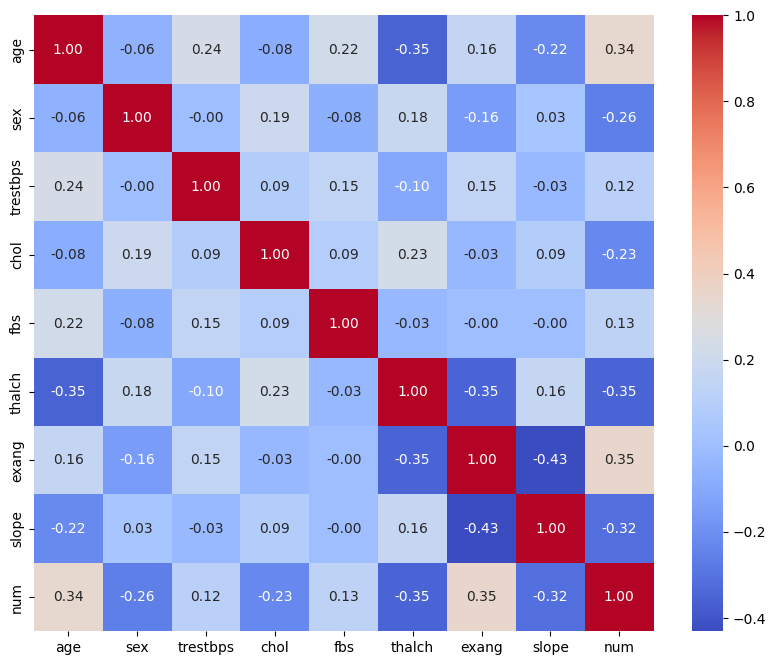

In [506]:
numerical_features = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch','exang','slope','num']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Now, Doing one hot Encoding on categorical variables

### Functions Ready for Model Training
- Traget: CP
- Features are: oldpeak, exang, age, fbs, trestbps

In [507]:
df.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')

In [508]:
X = df.drop(['id','cp'], axis = 1)
Y=df["cp"]
X.columns


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'num'],
      dtype='object')

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    int32  
 7   restecg   920 non-null    int64  
 8   thalch    920 non-null    float64
 9   exang     920 non-null    int32  
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    int64  
 12  num       920 non-null    int64  
dtypes: float64(4), int32(2), int64(6), object(1)
memory usage: 86.4+ KB


## Train Test Split

In [510]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=10)


As Its a Classification Problem so using models like:
- Logistic Regression
- DecisionTreeClassifier
- RandomForestClassifier 

### Logistic Regression

In [511]:
model = LogisticRegression()
target =  (df["cp"] == 'typical angina').astype(int)

x_train, x_test, target_train, target_test = train_test_split(X,target, test_size=0.3, random_state=10)


model.fit(x_train, target_train)

C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [512]:
target_pred = model.predict(x_test)
Accuracy_LR = accuracy_score(target_pred, target_test)
Accuracy_LR

0.9601449275362319

### Decsion Tree Classifier

In [513]:
model  = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [514]:
Y_pred = model.predict(X_test)
Accuracy_DT = accuracy_score(Y_pred, Y_test)
Accuracy_DT

0.4963768115942029

### Random Forest Classifier

In [515]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestClassifier()

In [516]:
Y_pred = model.predict(X_test)
accuracy_RF = accuracy_score(Y_test, Y_pred)
accuracy_RF

0.5905797101449275

### Hyper Tunning On Decision Tree and Rnadom Forest

### Decision Tree

# Grid Search

In [517]:
param_grid = {
    'max_depth': [2, 1, 5, 15, 10, 20],
    'min_samples_split': [1, 4, 2, 5, 10],
    'min_samples_leaf': [3, 1, 3, 4, 5, 6],
    'max_features': [1.0, 'sqrt']
}

##### cv is k-fold cross validation 

In [518]:
model = DecisionTreeClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 1, 5, 15, 10, 20],
                         'max_features': [1.0, 'sqrt'],
                         'min_samples_leaf': [3, 1, 3, 4, 5, 6],
                         'min_samples_split': [1, 4, 2, 5, 10]})

In [519]:
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy_HPT_DT = accuracy_score(Y_test,Y_pred)
accuracy_HPT_DT

0.5688405797101449

#### Random Search

In [520]:
param_dist_RS = {
    'max_depth': [2, 7, 5, 15, 10, 20],
    'min_samples_split': randint(1, 40),
    'min_samples_leaf': randint(1, 30),
    'max_features': [1.0, 'sqrt']
}

In [521]:
model = DecisionTreeClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_dist_RS, n_iter=10, cv=5)

random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [2, 7, 5, 15, 10, 20],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001688B7750C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001688B7753C0>})

In [522]:
best_model = random_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy_HPT_DT_RS = accuracy_score(Y_test,Y_pred)
accuracy_HPT_DT_RS

0.572463768115942

###  Random Forest

In [523]:
param_grid = {
    'max_depth': [2, 4, 6, 8,10],
    'min_samples_split': [1, 2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [524]:
model = RandomForestClassifier(n_estimators = 54) 
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=54),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]})

In [525]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [526]:
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy_HPT_RF = accuracy_score(Y_test,Y_pred)
accuracy_HPT_RF

0.6195652173913043

In [530]:
data = {"Accuracy": ["Logistic Regression", "DecisionTreeClassifier", "RandomForestClassifier", "DecisionTreeClassifier HPT GS", "DecisionTreeClassifier HPT RS", "RandomForestClassifier HPT GS"],
        "Values": [Accuracy_LR, Accuracy_DT, accuracy_RF, accuracy_HPT_DT, accuracy_HPT_DT_RS, accuracy_HPT_RF]}

In [532]:
DF = pd.DataFrame(data)
DF

,Accuracy,Values
0,Logistic Regression,0.960145
1,DecisionTreeClassifier,0.496377
2,RandomForestClassifier,0.590580
3,DecisionTreeClassifier HPT GS,0.568841
4,DecisionTreeClassifier HPT RS,0.572464
5,RandomForestClassifier HPT GS,0.619565
